# **Business Understanding**

**Objective:** The primary objective is to build a recommendation system that provides relevant news articles to users.

By doing this, we aim to:

Enhance user engagement by showing them articles tailored to their interests.

Increase the time users spend on the platform.

Reduce the bounce rate by ensuring users find content that resonates with them.

# **Data Understanding**

In [4]:
import pandas as pd

# Load the dataset
news_data = pd.read_csv('https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/DataPreparationAssignment/datasets/news.tsv', delimiter='\t', encoding='utf-8')

# Display the first few rows of the dataset
news_data.head()


,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By","Shop the notebooks, jackets, and more that the royals can't live without.",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"", ""Type"": ""P"", ""WikidataId"": ""Q80976"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [48], ""SurfaceForms"": [""Prince Philip""]}, {""Label"": ""Charles, Prince of Wales"", ""Type"": ""P"", ""WikidataId"": ""Q43274"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [28], ""SurfaceForms"": [""Prince Charles""]}, {""Label"": ""Elizabeth II"", ""Type"": ""P"", ""WikidataId"": ""Q9682"", ""Confidence"": 0.97, ""OccurrenceOffsets"": [11], ""SurfaceForms"": [""Queen Elizabeth""]}]",[]
0,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
1,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
2,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
3,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
4,N2073,sports,football_nfl,Should NFL be able to fine players for critici...,Several fines came down against NFL players fo...,https://assets.msn.com/labs/mind/AAJ4lap.html,"[{""Label"": ""National Football League"", ""Type"":...","[{""Label"": ""National Football League"", ""Type"":..."


In [5]:
# Rename columns for clarity
news_data.columns = [
    "Article_ID",
    "Category_Main",
    "Category_Sub",
    "Title",
    "Description",
    "URL",
    "Metadata_1",
    "Metadata_2"
]

# Display the first few rows with the renamed columns
news_data.head()


,Article_ID,Category_Main,Category_Sub,Title,Description,URL,Metadata_1,Metadata_2
0,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
1,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
2,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
3,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
4,N2073,sports,football_nfl,Should NFL be able to fine players for critici...,Several fines came down against NFL players fo...,https://assets.msn.com/labs/mind/AAJ4lap.html,"[{""Label"": ""National Football League"", ""Type"":...","[{""Label"": ""National Football League"", ""Type"":..."


The columns have been renamed for clarity:

**Article_ID:** Identifier for the news article.

**Category_Main:** Main category for the news article.

**Category_Sub:** Sub-category for the news article.

**Title:** Title of the news article.

**Description:** Description or snippet of the news article.

**URL:** Source or link to the full news article.

**Metadata_1:** Metadata or tags associated with the article.

**Metadata_2:** Additional metadata or tags associated with the article.

In [6]:
# Check for missing values
missing_values = news_data.isnull().sum()

# Display missing values count for each column
missing_values


Article_ID          0
Category_Main       0
Category_Sub        0
Title               0
Description      2666
URL                 0
Metadata_1          3
Metadata_2          4
dtype: int64

The Description column has 2,666 missing entries. This suggests that some news articles might not have a description or snippet associated with them.

The Metadata_1 and Metadata_2 columns have a few missing values (3 and 4, respectively). This could indicate that some articles do not have associated metadata or tags.


In [7]:
# Obtain a summary of basic statistics for the dataset
summary_stats = news_data.describe(include='all')

# Display the summary statistics
summary_stats


,Article_ID,Category_Main,Category_Sub,Title,Description,URL,Metadata_1,Metadata_2
count,51281,51281,51281,51281,48615,51281,51278,51277
unique,51281,17,264,50433,47308,51280,34471,36277
top,N19639,news,newsus,Photos of the Day,What's the weather today? What's the weather f...,[],[],[]
freq,1,15774,6564,15,124,2,13842,13824


Here's a summary of our dataset:

Article_ID: There are 51,281 unique article IDs, which matches the total count, suggesting that each article ID is unique.

Category_Main: There are 17 unique main categories, with 'news' being the most frequent category.

Category_Sub: There are 264 unique sub-categories, with 'newsus' (possibly representing US news) being the most frequent.

Title: There are 50,433 unique titles, with "Photos of the Day" being repeated 15 times, indicating that some articles share the same title.

Description: Out of 51,281 articles, 48,615 have descriptions. The most frequent description is related to weather and is repeated 124 times.

URL: There are 51,280 unique URLs, indicating that two articles might share the same URL. This needs further investigation.

Metadata_1 and Metadata_2: A significant number of articles (13,842 and 13,824 respectively) don't have associated metadata.

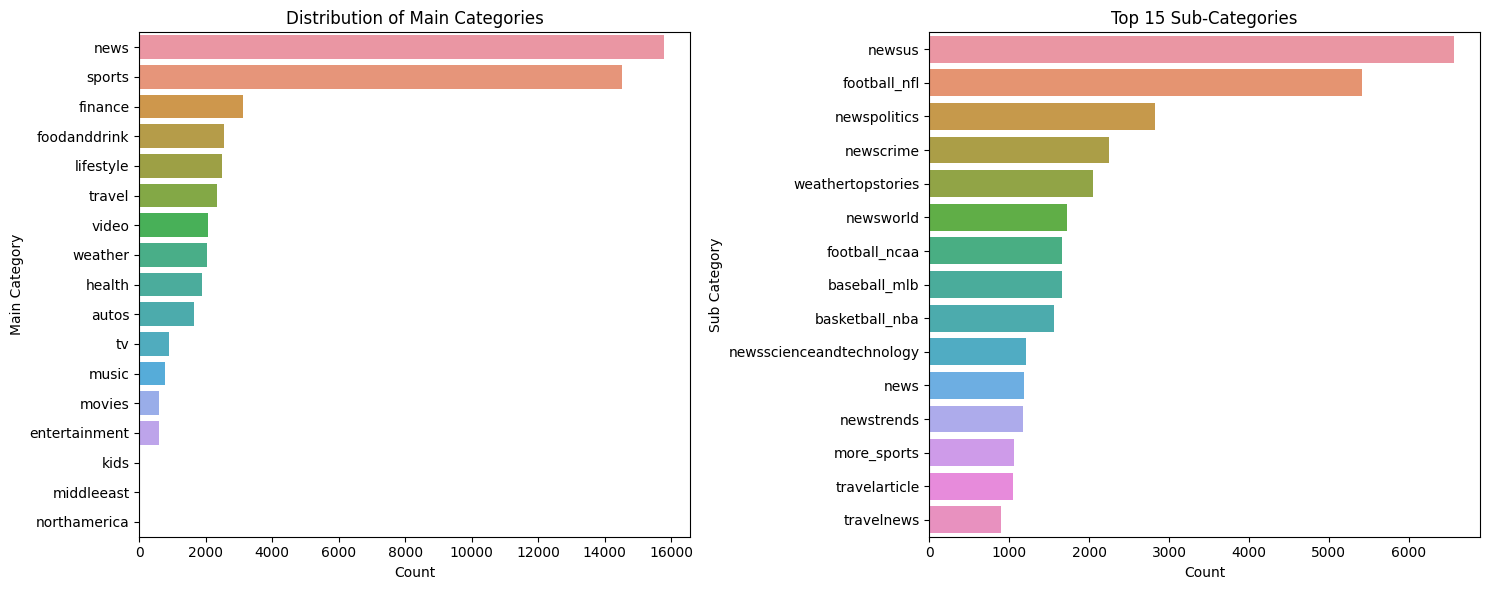

,Article_ID,Title,URL
2172,N49553,The 50 Most Common Last Names in America,[]
16458,N20922,The Price You Pay: The spiraling cost of colle...,[]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Investigate the repeated URL
repeated_url = news_data[news_data.duplicated('URL', keep=False)]
repeated_url_articles = repeated_url[['Article_ID', 'Title', 'URL']]

# Visualize the distribution of main and sub-categories
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(y='Category_Main', data=news_data, order=news_data['Category_Main'].value_counts().index)
plt.title('Distribution of Main Categories')
plt.xlabel('Count')
plt.ylabel('Main Category')

plt.subplot(1, 2, 2)
sub_category_counts = news_data['Category_Sub'].value_counts()[:15]  # Top 15 sub-categories
sns.barplot(y=sub_category_counts.index, x=sub_category_counts.values)
plt.title('Top 15 Sub-Categories')
plt.xlabel('Count')
plt.ylabel('Sub Category')

plt.tight_layout()
plt.show()

repeated_url_articles


The visualizations provide the following insights:

**Distribution of Main Categories:** The 'news' category dominates, followed by categories like 'health', 'sports', and 'lifestyle'.

**Top 15 Sub-Categories:** 'newsus' (likely representing US news) is the most frequent sub-category, followed by others like 'newspolitics', 'healthmedical', and 'football_nfl'.

# **Data Preparation**

**Missing Values**

In [9]:
# Handle missing values

# Filling missing descriptions with a placeholder value
news_data['Description'].fillna('No description available', inplace=True)

# Filling missing metadata with empty JSON arrays
news_data['Metadata_1'].fillna('[]', inplace=True)
news_data['Metadata_2'].fillna('[]', inplace=True)

# Filling empty URLs with a placeholder value
news_data['URL'] = news_data['URL'].apply(lambda x: 'No URL available' if x == '[]' else x)

# Check if there are any remaining missing values
remaining_missing_values = news_data.isnull().sum()
remaining_missing_values


Article_ID       0
Category_Main    0
Category_Sub     0
Title            0
Description      0
URL              0
Metadata_1       0
Metadata_2       0
dtype: int64

All missing values have been successfully addressed:

The Description column has been filled with the placeholder "No description available" where values were missing.

The Metadata_1 and Metadata_2 columns have been filled with empty JSON arrays ([]) where values were missing.

Articles with empty URLs now have the placeholder "No URL available."

**Data Cleaning and Text processing**

In [10]:
import re

# Function to clean and process text data
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespaces
    text = text.strip()
    return text

# Apply the cleaning function to the Title and Description columns
news_data['Title'] = news_data['Title'].apply(clean_text)
news_data['Description'] = news_data['Description'].apply(clean_text)

# Display the first few rows after text processing
news_data[['Title', 'Description']].head()


,Title,Description
0,worst habits for belly fat,these seemingly harmless habits are holding yo...
1,the cost of trumps aid freeze in the trenches ...,lt ivan molchanets peeked over a parapet of sa...
2,i was an nba wife heres how it affected my men...,i felt like i was a fraud and being an nba wif...
3,how to get rid of skin tags according to a der...,they seem harmless but theres a very good reas...
4,should nfl be able to fine players for critici...,several fines came down against nfl players fo...


The Title and Description columns have been cleaned:

All text has been converted to lowercase.

Special characters and numbers have been removed.

Extra whitespaces have been trimmed.

**Feature Engineering**

In [11]:
import json

# Function to extract the number of metadata tags from the JSON string
def extract_metadata_count(metadata_str):
    try:
        metadata_list = json.loads(metadata_str)
        return len(metadata_list)
    except:
        return 0

# Create new features based on text length
news_data['Title_Length'] = news_data['Title'].apply(len)
news_data['Description_Length'] = news_data['Description'].apply(len)

# Create new features based on metadata count
news_data['Metadata_1_Count'] = news_data['Metadata_1'].apply(extract_metadata_count)
news_data['Metadata_2_Count'] = news_data['Metadata_2'].apply(extract_metadata_count)

# Display the first few rows with the new features
news_data[['Title_Length', 'Description_Length', 'Metadata_1_Count', 'Metadata_2_Count']].head()


,Title_Length,Description_Length,Metadata_1_Count,Metadata_2_Count
0,26,115,1,1
1,61,192,0,1
2,56,94,0,1
3,56,172,1,3
4,62,116,1,1


The new features have been successfully created:

Title_Length: Represents the length of the title.

Description_Length: Represents the length of the description.

Metadata_1_Count: Represents the number of metadata tags in the Metadata_1 column.

Metadata_2_Count: Represents the number of metadata tags in the Metadata_2 column.

# **Modeling**

Build a simple content-based recommendation approach using the Title and Description columns of our dataset.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Build the TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(news_data['Description'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on cosine similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = news_data.index[news_data['Title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar articles
    article_indices = [i[0] for i in sim_scores]
    return news_data['Title'].iloc[article_indices]

# Test the recommender with a sample titles
sample_title = news_data['Title'].iloc[5]
recommendations = get_recommendations(sample_title)

recommendations
